<a href="https://colab.research.google.com/github/nallalaharivijay/Anomaly-Detection-in-CloudMonitor-Data/blob/main/Anomaly%20Detection%20in%20CloudMonitor%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
file_path = "/content/drive/My Drive/computing-usage-dataset/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


I uploded the csv data file to Google Drive

In [ ]:
import pandas as pd
import glob

filepath = glob.glob('/content/drive/My Drive/computing-usage-dataset/*.csv')

dataframes = []
for file in filepath:
    df = pd.read_csv(file, parse_dates=['timestamp'])
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

print(combined_df.head())

print(combined_df.tail())



            timestamp    value
0 2014-01-16 00:00:00  33.5573
1 2014-01-16 00:05:00  33.4460
2 2014-01-16 00:10:00  33.4447
3 2014-01-16 00:15:00  33.3333
4 2014-01-16 00:20:00  33.4447
                timestamp    value
67735 2014-04-23 23:37:00  17.0900
67736 2014-04-23 23:42:00  17.0800
67737 2014-04-23 23:47:00  17.0825
67738 2014-04-23 23:52:00  16.2525
67739 2014-04-23 23:57:00  18.0050


Combing 17 data files into single csv file by appending it vertically.

In [ ]:
combined_df['value'].isna().sum()

0

To check any null values or present or not.

In [ ]:
combined_df.describe()

,timestamp,value
count,67740,6.774000e+04
mean,2014-03-15 15:23:38.885739776,1.618121e+06
min,2013-10-09 16:25:00,0.000000e+00
25%,2014-02-22 06:57:00,1.340000e-01
50%,2014-03-15 08:27:30,1.566800e+01
75%,2014-04-12 22:50:30,5.200000e+01
max,2014-04-24 00:39:00,8.639640e+08
std,NaN,2.263205e+07


In [ ]:
combined_df.info()
combined_df = combined_df.sort_values(by='timestamp')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67740 entries, 0 to 67739
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  67740 non-null  datetime64[ns]
 1   value      67740 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


Sorted according to date and time.

{'whiskers': [<matplotlib.lines.Line2D at 0x79692c214910>,
 'caps': [<matplotlib.lines.Line2D at 0x79692c216320>,
 'boxes': [<matplotlib.lines.Line2D at 0x79692c2177f0>],
 'medians': [<matplotlib.lines.Line2D at 0x79692c2170d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79692c2156c0>],
 'means': []}

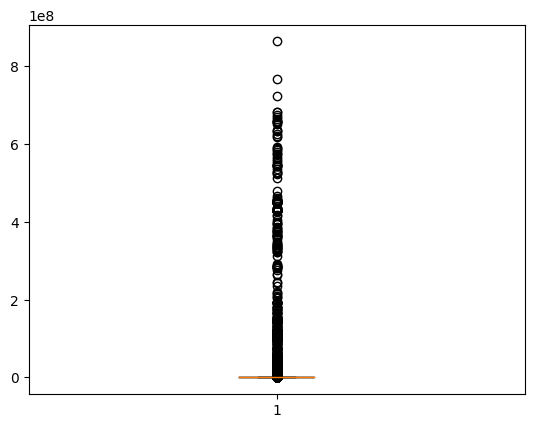

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(combined_df['value'])

Plotted to see how the values are given and even to check any outliers.

Y-axis limits: (-43198200.0, 907162200.0)


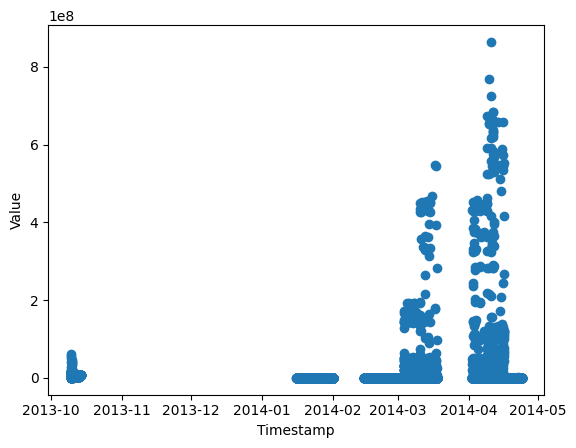

In [ ]:
plt.scatter(combined_df['timestamp'], combined_df['value'])
plt.xlabel('Timestamp')
plt.ylabel('Value')
ylimit = plt.gca().get_ylim()
print("Y-axis limits:", ylimit)

In [ ]:
print(combined_df.head())

print(combined_df.tail())

combined_df['value'].max()

                timestamp       value
16717 2013-10-09 16:25:00   9926554.0
16718 2013-10-09 16:30:00  50745578.0
16719 2013-10-09 16:35:00  61519397.0
16720 2013-10-09 16:40:00  55996401.0
16721 2013-10-09 16:45:00  40876988.0
                timestamp  value
34781 2014-04-24 00:19:00   32.0
34782 2014-04-24 00:24:00   57.0
34783 2014-04-24 00:29:00   10.0
34784 2014-04-24 00:34:00   18.0
34785 2014-04-24 00:39:00   60.0


863964000.0

I wanted to know what is max value of value and see the scale matches with the graph accprdingly.

In [ ]:
combined_df['rollmean'] = combined_df['value'].rolling(window=10).mean()
combined_df['rollstd'] = combined_df['value'].rolling(window=10).std()
combined_df['con_difference'] = combined_df['value'].diff()

The rolling mean of the 'value' column, using a window size of 10. The result is stored in a new column 'rollmean'. The rolling mean smooths out short-term fluctuations and highlights longer-term trends. Window size gives output by taking first 10 inputs to 10th value first 9 values will be NA.

The rolling standard deviation measures the variability or spread of the data within each window, providing insight into how much the values fluctuate.

Difference is useful for detecting changes or trends in the data, such as identifying sudden shifts or trends in time series data.

In [ ]:
combined_df.head(10)

,timestamp,value,rollmean,rollstd,con_difference
16717,2013-10-09 16:25:00,9926554.0,NaN,NaN,NaN
16718,2013-10-09 16:30:00,50745578.0,NaN,NaN,40819024.0
16719,2013-10-09 16:35:00,61519397.0,NaN,NaN,10773819.0
16720,2013-10-09 16:40:00,55996401.0,NaN,NaN,-5522996.0
16721,2013-10-09 16:45:00,40876988.0,NaN,NaN,-15119413.0
16722,2013-10-09 16:50:00,27578939.0,NaN,NaN,-13298049.0
16723,2013-10-09 16:55:00,21556437.0,NaN,NaN,-6022502.0
16724,2013-10-09 17:00:00,17440444.6,NaN,NaN,-4115992.4
16725,2013-10-09 17:05:00,15573374.0,NaN,NaN,-1867070.6
16726,2013-10-09 17:10:00,16861197.6,31807531.02,1.886766e+07,1287823.6


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
combined_df[['value', 'rollmean', 'rollstd', 'con_difference']] = scaler.fit_transform(
    combined_df[['value', 'rollmean', 'rollstd', 'con_difference']]
)

Maxminscaler is used to normalise the values between 0 to 1.

In [ ]:
combined_df.head(10)

,timestamp,value,rollmean,rollstd,con_difference
16717,2013-10-09 16:25:00,0.011490,NaN,NaN,NaN
16718,2013-10-09 16:30:00,0.058736,NaN,NaN,0.523623
16719,2013-10-09 16:35:00,0.071206,NaN,NaN,0.506235
16720,2013-10-09 16:40:00,0.064813,NaN,NaN,0.496804
16721,2013-10-09 16:45:00,0.047313,NaN,NaN,0.491250
16722,2013-10-09 16:50:00,0.031921,NaN,NaN,0.492304
16723,2013-10-09 16:55:00,0.024951,NaN,NaN,0.496515
16724,2013-10-09 17:00:00,0.020187,NaN,NaN,0.497618
16725,2013-10-09 17:05:00,0.018025,NaN,NaN,0.498919
16726,2013-10-09 17:10:00,0.019516,0.235571,0.06647,0.500745


In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
combined_df['anomaly'] = model.fit_predict(combined_df[['value']])

IsolationForest is perfect for anomaly detection, so I used this algorithm for this other than this we can use SVM or KNN or K-means(if data is small).

In [ ]:
combined_df['con_difference'].fillna(0)
combined_df.describe()

,timestamp,value,rollmean,rollstd,con_difference,anomaly
count,67740,6.774000e+04,6.773100e+04,6.773100e+04,67739.000000,67740.000000
mean,2014-03-15 15:23:38.885739520,1.872903e-03,1.196711e-02,1.445131e-02,0.500000,0.981370
min,2013-10-09 16:25:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.000000
25%,2014-02-22 06:57:00,1.550991e-10,8.284846e-08,5.927171e-08,0.500000,1.000000
50%,2014-03-15 08:27:30,1.813501e-08,2.525521e-07,1.388751e-07,0.500000,1.000000
75%,2014-04-12 22:50:30,6.018769e-08,3.452775e-04,3.497775e-04,0.500000,1.000000
max,2014-04-24 00:39:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000
std,NaN,2.619560e-02,6.085135e-02,7.696225e-02,0.018513,0.192129


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67740 entries, 16717 to 34785
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       67740 non-null  datetime64[ns]
 1   value           67740 non-null  float64       
 2   rollmean        67731 non-null  float64       
 3   rollstd         67731 non-null  float64       
 4   con_difference  67739 non-null  float64       
 5   anomaly         67740 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 3.6 MB


In [ ]:
combined_df['category'] = combined_df['con_difference'].apply(lambda x: 'spike' if x > 0.1 else 'drop' if x < -0.1 else 'drift')

A logic to differentiate between spike, drop and drift.

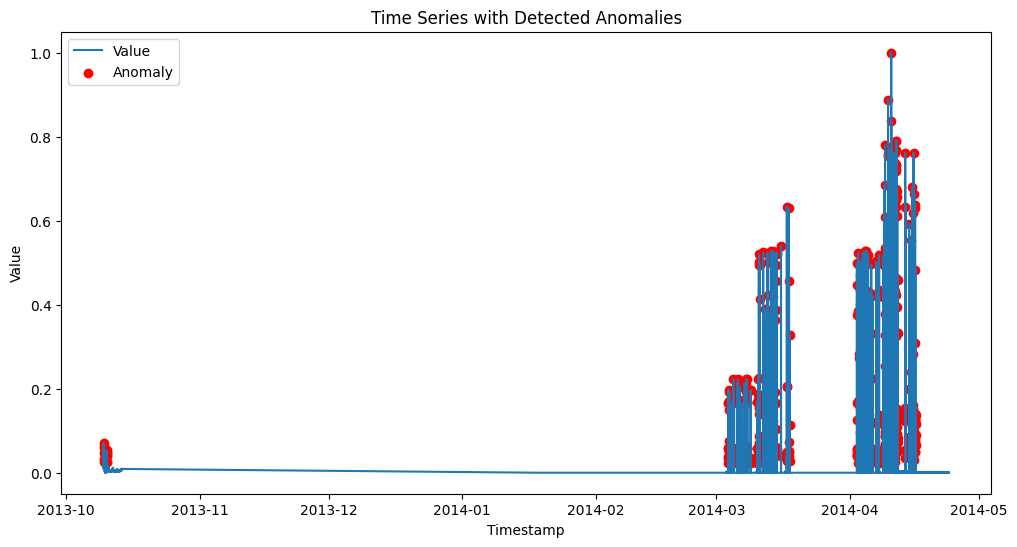

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['timestamp'], combined_df['value'], label='Value')
plt.scatter(combined_df['timestamp'][combined_df['anomaly'] == -1], combined_df['value'][combined_df['anomaly'] == -1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series with Detected Anomalies')
plt.legend()
plt.show()

In [ ]:

print(combined_df[combined_df['anomaly'] == 1][['timestamp', 'value', 'category']])


                timestamp         value category
16717 2013-10-09 16:25:00  1.148955e-02    drift
16724 2013-10-09 17:00:00  2.018654e-02    spike
16725 2013-10-09 17:05:00  1.802549e-02    spike
16726 2013-10-09 17:10:00  1.951609e-02    spike
16727 2013-10-09 17:15:00  1.791527e-02    spike
...                   ...           ...      ...
34781 2014-04-24 00:19:00  3.703858e-08    spike
34782 2014-04-24 00:24:00  6.597497e-08    spike
34783 2014-04-24 00:29:00  1.157456e-08    spike
34784 2014-04-24 00:34:00  2.083420e-08    spike
34785 2014-04-24 00:39:00  6.944734e-08    spike

[67109 rows x 3 columns]


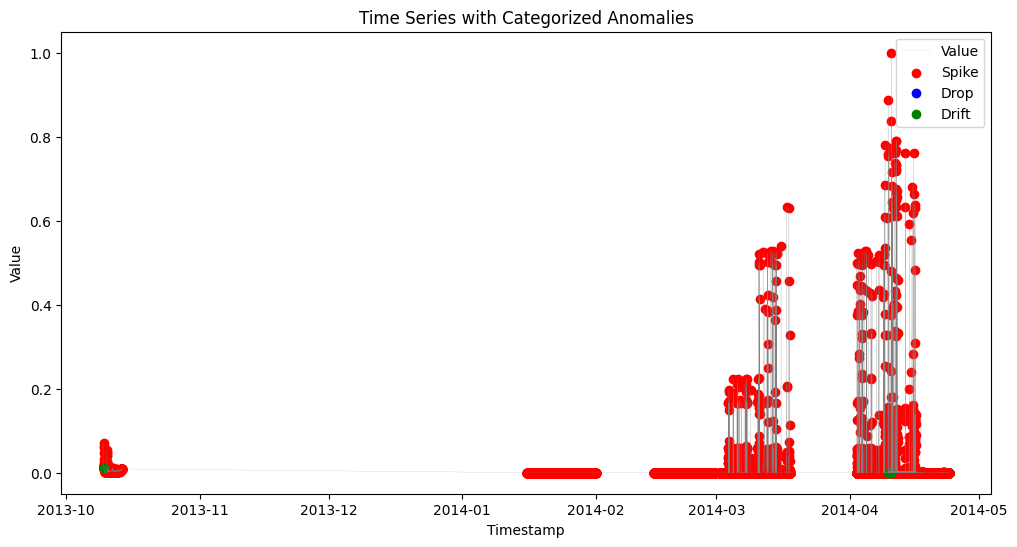

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['timestamp'], combined_df['value'], label='Value', color='gray', linewidth=0.1)
category_colors = {'spike': 'red', 'drop': 'blue', 'drift': 'green'}
for category, color in category_colors.items():
    category_data = combined_df[combined_df['category'] == category]
    plt.scatter(category_data['timestamp'], category_data['value'], label=category.capitalize(), color=color)
plt.title('Time Series with Categorized Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

truelabels = combined_df['anomaly'].copy()
truelabels.iloc[10:15] = -1
truelabels.iloc[50:55] = -1

predictedlabels = (combined_df['anomaly'] == -1).astype(int)

truelabels= (truelabels == -1).astype(int)
precision = precision_score(truelabels, predictedlabels)
recall = recall_score(truelabels, predictedlabels)
f1 = f1_score(truelabels, predictedlabels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 1.0
Recall: 0.984399375975039
F1 Score: 0.9921383647798743
